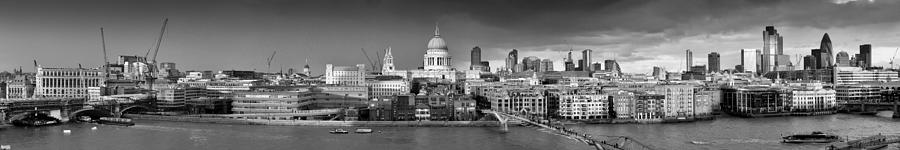

#                  Location for new Retail Business London Borough Analysis


In [10]:
# library for BeautifulSoup
from bs4 import BeautifulSoup
import urllib.request

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')
# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

import random
import csv
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium
# map rendering library
print('folium imported...')
print('...Done')


numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [11]:
conda install -c anaconda anaconda-client

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - anaconda-client


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> anaconda::conda-4.8.3-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  anaconda-client                                 pkgs/main --> anaconda


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




#### Scraping data from Wikipedia website

In [12]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_London_boroughs")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

In [13]:
London=pd.DataFrame(df[0])

In [14]:
London

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


### Standataize data names using iloc.

In [15]:
London.iloc[0,0] = 'Barking and Dagenham'
London.iloc[9,0] = 'Greenwich'
London.iloc[11,0] = 'Hammersmith and Fulham'

In [16]:
London = London.rename(columns = {'Population (2013 est)[1]':'Population 2013'})

In [17]:
London

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population 2013,Co-ordinates,Nr. in map
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich,[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


### Creating new dataset

In [18]:
London.iloc[0:32, [0, 6,7]]

,Borough,Area (sq mi),Population 2013
0,Barking and Dagenham,13.93,194352
1,Barnet,33.49,369088
2,Bexley,23.38,236687
3,Brent,16.70,317264
4,Bromley,57.97,317899
5,Camden,8.40,229719
6,Croydon,33.41,372752
7,Ealing,21.44,342494
8,Enfield,31.74,320524
9,Greenwich,18.28,264008


### Uploadind earning data csv.

In [19]:
London1 = London.iloc[0:32, [0, 6,7]]

In [20]:
earnings_data = pd.read_csv(r"C:\Users\magda\OneDrive\Desktop\earnings-workplace-borough.csv")

In [21]:
earnings_data.head()

,code,Area,2019
0,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,20980.0
2,E09000003,Barnet,21661.0
3,E09000004,Bexley,21440.0
4,E09000005,Brent,22818.0


In [22]:
earnings_data.iloc[1:33, [1, 2]]

,Area,2019
1,Barking and Dagenham,20980.0
2,Barnet,21661.0
3,Bexley,21440.0
4,Brent,22818.0
5,Bromley,0.0
6,Camden,29315.0
7,Croydon,26094.0
8,Ealing,22824.0
9,Enfield,21720.0
10,Greenwich,22689.0


### Uplading tourism data csv.

In [23]:
tourism_data = pd.read_csv(r"C:\Users\magda\OneDrive\Desktop\tourism-spend-borough.csv")

In [24]:
tourism_data.head()

,Area,Overseas f/f £mln.,Domestic f/f £mln.,Day f/f £mln.
0,Barking and Dagenham,47,10,63
1,Barnet,155,31,392
2,Bexley,87,19,134
3,Brent,125,26,223
4,Bromley,128,23,263


In [25]:
tourism_data.dropna(inplace =True)

In [26]:
tourism_data.head()

,Area,Overseas f/f £mln.,Domestic f/f £mln.,Day f/f £mln.
0,Barking and Dagenham,47,10,63
1,Barnet,155,31,392
2,Bexley,87,19,134
3,Brent,125,26,223
4,Bromley,128,23,263


### Standataize data names 

In [27]:
df = earnings_data.iloc[1:33, [1, 2]]

In [28]:
df= df.rename(columns = {'Area':'Borough'})

In [29]:
df = df.rename(columns = {'2019': 'Earnings 2019'})

In [30]:
df

,Borough,Earnings 2019
1,Barking and Dagenham,20980.0
2,Barnet,21661.0
3,Bexley,21440.0
4,Brent,22818.0
5,Bromley,0.0
6,Camden,29315.0
7,Croydon,26094.0
8,Ealing,22824.0
9,Enfield,21720.0
10,Greenwich,22689.0


In [31]:
df1 = tourism_data

In [32]:
df1 = df1.rename(columns = {'Area':'Borough'})

In [33]:
df1

,Borough,Overseas f/f £mln.,Domestic f/f £mln.,Day f/f £mln.
0,Barking and Dagenham,47,10,63
1,Barnet,155,31,392
2,Bexley,87,19,134
3,Brent,125,26,223
4,Bromley,128,23,263
5,Camden,591,163,771
6,Croydon,162,31,261
7,Ealing,171,35,361
8,Enfield,130,29,157
9,Greenwich,89,27,213


In [34]:
London1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Borough          32 non-null     object 
 1   Area (sq mi)     32 non-null     float64
 2   Population 2013  32 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


### Checking all dates shape and set 

In [35]:
London1.shape

(32, 3)

In [36]:
set(df.Borough) - set(London1.Borough)

set()

In [37]:
df.shape

(32, 2)

In [38]:
set(df.Borough) - set(df.Borough)

set()

In [39]:
df1.shape

(32, 4)

In [40]:
set(df.Borough) - set(df1.Borough)

set()

In [41]:
inner_merged = pd.merge(London1, df)
inner_merged
London2 = inner_merged 
London2



,Borough,Area (sq mi),Population 2013,Earnings 2019
0,Barking and Dagenham,13.93,194352,20980.0
1,Barnet,33.49,369088,21661.0
2,Bexley,23.38,236687,21440.0
3,Brent,16.70,317264,22818.0
4,Bromley,57.97,317899,0.0
5,Camden,8.40,229719,29315.0
6,Croydon,33.41,372752,26094.0
7,Ealing,21.44,342494,22824.0
8,Enfield,31.74,320524,21720.0
9,Greenwich,18.28,264008,22689.0


### Mergeding  all datas

In [42]:
inner_merged = pd.merge(London2, df1)

In [43]:
London3 = inner_merged 
London3

,Borough,Area (sq mi),Population 2013,Earnings 2019,Overseas f/f £mln.,Domestic f/f £mln.,Day f/f £mln.
0,Barking and Dagenham,13.93,194352,20980.0,47,10,63
1,Barnet,33.49,369088,21661.0,155,31,392
2,Bexley,23.38,236687,21440.0,87,19,134
3,Brent,16.70,317264,22818.0,125,26,223
4,Bromley,57.97,317899,0.0,128,23,263
5,Camden,8.40,229719,29315.0,591,163,771
6,Croydon,33.41,372752,26094.0,162,31,261
7,Ealing,21.44,342494,22824.0,171,35,361
8,Enfield,31.74,320524,21720.0,130,29,157
9,Greenwich,18.28,264008,22689.0,89,27,213


### Checking correlation 

In [44]:
London3.corr()

,Area (sq mi),Population 2013,Earnings 2019,Overseas f/f £mln.,Domestic f/f £mln.,Day f/f £mln.
Area (sq mi),1.000000,0.433163,-0.444858,-0.218030,-0.240641,-0.235366
Population 2013,0.433163,1.000000,0.021266,-0.188983,-0.196796,-0.137426
Earnings 2019,-0.444858,0.021266,1.000000,0.259659,0.277895,0.282601
Overseas f/f £mln.,-0.218030,-0.188983,0.259659,1.000000,0.998735,0.979242
Domestic f/f £mln.,-0.240641,-0.196796,0.277895,0.998735,1.000000,0.979022
Day f/f £mln.,-0.235366,-0.137426,0.282601,0.979242,0.979022,1.000000


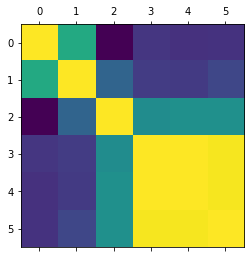

In [45]:
plt.matshow(London3.corr())
plt.show()

### Vizualization of relationship

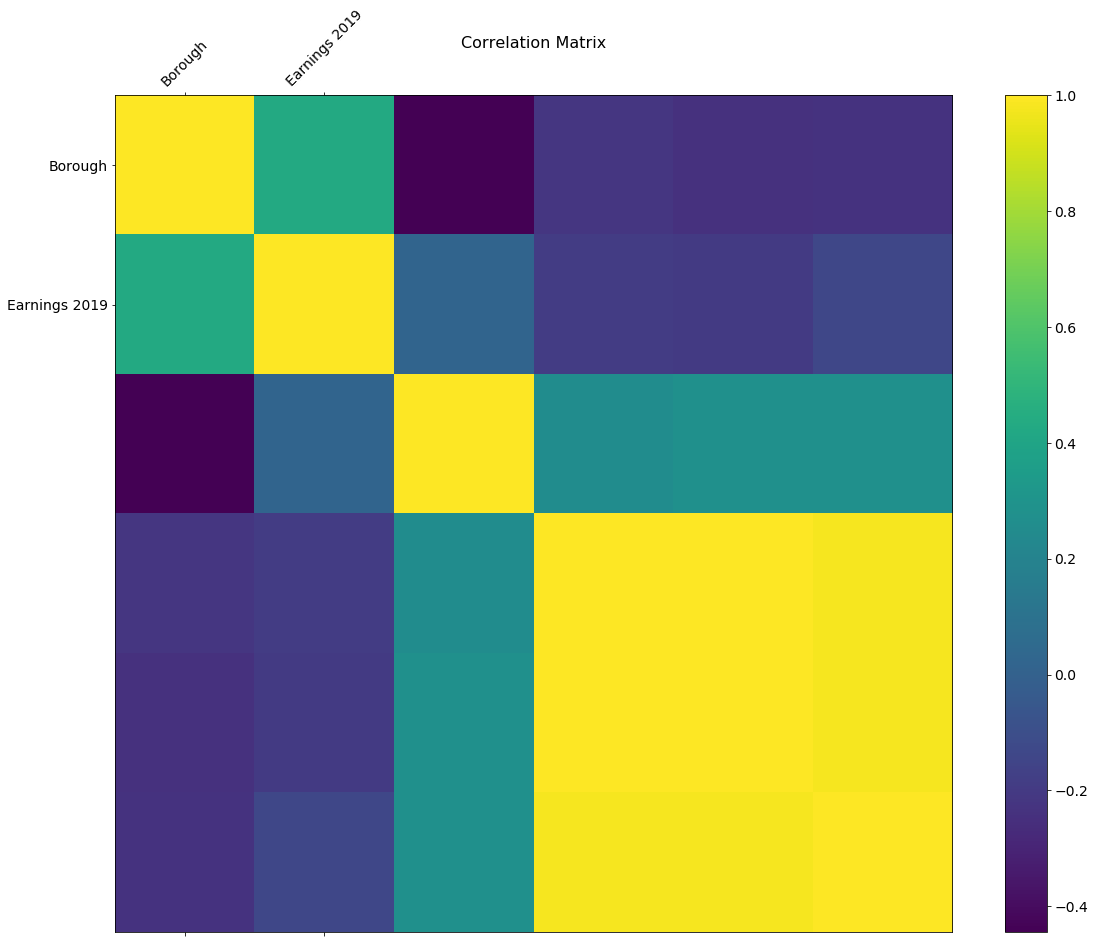

In [46]:
f = plt.figure(figsize=(19, 15))
plt.matshow(London3.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Geting coordinates

In [47]:
London_borough = pd.read_csv(r'C:\Users\magda\OneDrive\Desktop\London_Borough.csv')

In [48]:
London_borough.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5363,0.0815
1,Barnet,51.5523,-0.3026
2,Bexley,51.4167,0.1333
3,Brent,51.5523,-0.3026
4,Bromley,51.4057,0.0144


In [49]:
London_borough['Latitude'] = London_borough['Latitude']
London_borough['Longitude'] = London_borough['Longitude']

In [50]:
London_borough.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5363,0.0815
1,Barnet,51.5523,-0.3026
2,Bexley,51.4167,0.1333
3,Brent,51.5523,-0.3026
4,Bromley,51.4057,0.0144


In [51]:
address = 'London, UK'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


### Creating map of London borough

In [52]:

# create map of Toronto using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough  in zip(London_borough['Latitude'], London_borough['Longitude'], London_borough['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

### Utilizing the Foursquare API to explore the boroug's and segment them

In [53]:
CLIENT_ID = 'FOG4IUBUX0UL2ZPE0YSHWNS41D03YSNNUTINAEZ5XNF2TWUO' # your Foursquare ID
CLIENT_SECRET = 'VHXKEZ4PQALIUCE4RCP13DM5SELIXT1Z0IWAVINUUWLXAIIE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FOG4IUBUX0UL2ZPE0YSHWNS41D03YSNNUTINAEZ5XNF2TWUO
CLIENT_SECRET:VHXKEZ4PQALIUCE4RCP13DM5SELIXT1Z0IWAVINUUWLXAIIE


### Geting the borough's latitude and longitude values

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=200, LIMIT=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
london_venues = getNearbyVenues(names=London_borough['Borough'],
                                   latitudes=London_borough['Latitude'],
                                   longitudes=London_borough['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


### create a new dataframe called london_venues

In [56]:
print(london_venues.shape)
london_venues.head()

(448, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5363,0.0815,Subway,51.538000,0.081319,Sandwich Place
1,Barking and Dagenham,51.5363,0.0815,Lidl,51.535761,0.081843,Supermarket
2,Barking and Dagenham,51.5363,0.0815,B&M Store,51.537903,0.081301,Discount Store
3,Barking and Dagenham,51.5363,0.0815,Tesco Express,51.536931,0.080411,Grocery Store
4,Barking and Dagenham,51.5363,0.0815,Travelodge London Barking,51.537277,0.079857,Hotel


### checking how many venues were returned for each borough

In [57]:
london_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Bromley,31,31,31,31,31,31
Camden,47,47,47,47,47,47
Croydon,12,12,12,12,12,12
Ealing,40,40,40,40,40,40
Enfield,48,48,48,48,48,48
Greenwich,10,10,10,10,10,10
Hackney,2,2,2,2,2,2
Hammersmith and Fulham,46,46,46,46,46,46


In [58]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 123 uniques categories.


### Analyze Each Borough

In [110]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Multiplex,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Platform,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Restaurant,Road,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Women's Store
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
london_onehot = london_onehot.rename(columns = {"Women's Store": "Womens Store"})

In [136]:
london_onehot

,Borough,Afghan Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Multiplex,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Platform,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Restaurant,Road,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Womens Store
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,Bromley,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [137]:
london_onehot.shape

(448, 124)

### group rows by borough and by taking the mean of the frequency of occurrence of each category

In [138]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Convenience Store,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Multiplex,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Platform,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Restaurant,Road,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Souvenir Shop,Souvlaki Shop,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Womens Store
0,Barking and Dagenham,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bromley,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.032258,0.032258,0.000000,0.0,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.129032,0.064516,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.032258,0.032258,0.0,0.096774,0.000000,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.0,0.032258,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
2,Camden,0.021277,0.000000,0.0,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.0

In [139]:
london_grouped.shape

(26, 124)

### Creating new London store date only for retail stores

In [140]:
London_store = london_grouped

In [141]:
London_store = pd.DataFrame(London_store,columns=['Borough','Boutique','Clothing Store','Convenience Store', 'Department Store', 'Fabric Shop', 'Lounge','Shoe Store', 'Shopping Mall', 'Souvenir Shop', 'Sporting Goods Shop', 'Thrift / Vintage Store', 'Womens Store' ])
London_store

,Borough,Boutique,Clothing Store,Convenience Store,Department Store,Fabric Shop,Lounge,Shoe Store,Shopping Mall,Souvenir Shop,Sporting Goods Shop,Thrift / Vintage Store,Womens Store
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bromley,0.000000,0.129032,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Camden,0.021277,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000
3,Croydon,0.000000,0.083333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Ealing,0.000000,0.100000,0.000000,0.025000,0.00,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000
5,Enfield,0.000000,0.104167,0.000000,0.041667,0.00,0.000000,0.020833,0.041667,0.000000,0.020833,0.000000,0.020833
6,Greenwich,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
7,Hackney,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Hammersmith and Fulham,0.000000,0.043478,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Haringey,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### printing each borough along with the top 5 most common venues

In [142]:

num_top_venues = 5

for hood in London_store['Borough']:
    print("----"+hood+"----")
    temp = London_store[London_store['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0           Boutique   0.0
1     Clothing Store   0.0
2  Convenience Store   0.0
3   Department Store   0.0
4        Fabric Shop   0.0


----Bromley----
               venue  freq
0     Clothing Store  0.13
1           Boutique  0.00
2  Convenience Store  0.00
3   Department Store  0.00
4        Fabric Shop  0.00


----Camden----
                    venue  freq
0                Boutique  0.02
1  Thrift / Vintage Store  0.02
2          Clothing Store  0.00
3       Convenience Store  0.00
4        Department Store  0.00


----Croydon----
               venue  freq
0     Clothing Store  0.08
1           Boutique  0.00
2  Convenience Store  0.00
3   Department Store  0.00
4        Fabric Shop  0.00


----Ealing----
               venue  freq
0     Clothing Store  0.10
1   Department Store  0.02
2      Shopping Mall  0.02
3           Boutique  0.00
4  Convenience Store  0.00


----Enfield----
                 venue  freq
0       Clothi

In [143]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### creating the new dataframe and display the top 10 venues for each borough

In [144]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = London_store['Borough']

for ind in np.arange(London_store.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_store.iloc[ind, :], num_top_venues)

borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
1,Bromley,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
2,Camden,Thrift / Vintage Store,Boutique,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
3,Croydon,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
4,Ealing,Clothing Store,Shopping Mall,Department Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shoe Store,Lounge,Fabric Shop
5,Enfield,Clothing Store,Shopping Mall,Department Store,Womens Store,Sporting Goods Shop,Shoe Store,Thrift / Vintage Store,Souvenir Shop,Lounge,Fabric Shop
6,Greenwich,Thrift / Vintage Store,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
7,Hackney,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
8,Hammersmith and Fulham,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
9,Haringey,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store


### Cluster Borough's

Run k-means to cluster the borough into 5 clusters.

In [145]:

# set number of clusters
kclusters = 5

London_store_clustering = London_store.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_store_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 1, 3, 3, 3, 1, 1, 1, 1])

### createing a new dataframe that includes the cluster as well as the top 10 venues for each borough

In [147]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

London_store_merged = London_borough

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_store_merged = London_store_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')

London_store_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5363,0.0815,1.0,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
1,Barnet,51.5523,-0.3026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bexley,51.4167,0.1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brent,51.5523,-0.3026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bromley,51.4057,0.0144,3.0,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store


In [148]:
London_store_merged.dropna(inplace =True)

In [149]:
London_store_merged.head()

,Borough,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5363,0.0815,1.0,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
4,Bromley,51.4057,0.0144,3.0,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
5,Camden,51.5350,-0.1037,1.0,Thrift / Vintage Store,Boutique,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
6,Croydon,51.3724,-0.1004,3.0,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
7,Ealing,51.5134,-0.3042,3.0,Clothing Store,Shopping Mall,Department Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shoe Store,Lounge,Fabric Shop


In [150]:
London_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 26 non-null     object 
 1   Latitude                26 non-null     float64
 2   Longitude               26 non-null     float64
 3   Cluster_Labels          26 non-null     float64
 4   1st Most Common Venue   26 non-null     object 
 5   2nd Most Common Venue   26 non-null     object 
 6   3rd Most Common Venue   26 non-null     object 
 7   4th Most Common Venue   26 non-null     object 
 8   5th Most Common Venue   26 non-null     object 
 9   6th Most Common Venue   26 non-null     object 
 10  7th Most Common Venue   26 non-null     object 
 11  8th Most Common Venue   26 non-null     object 
 12  9th Most Common Venue   26 non-null     object 
 13  10th Most Common Venue  26 non-null     object 
dtypes: float64(3), object(11)
memory usage: 3.0+

In [297]:
London_store_merged = London_store_merged.rename(columns = {'Cluster_Labels':'Cluster Labels'})

In [298]:
London_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 27 non-null     object 
 1   Latitude                27 non-null     float64
 2   Longitude               27 non-null     float64
 3   Cluster Labels          27 non-null     int32  
 4   1st Most Common Venue   27 non-null     object 
 5   2nd Most Common Venue   27 non-null     object 
 6   3rd Most Common Venue   27 non-null     object 
 7   4th Most Common Venue   27 non-null     object 
 8   5th Most Common Venue   27 non-null     object 
 9   6th Most Common Venue   27 non-null     object 
 10  7th Most Common Venue   27 non-null     object 
 11  8th Most Common Venue   27 non-null     object 
 12  9th Most Common Venue   27 non-null     object 
 13  10th Most Common Venue  27 non-null     object 
dtypes: float64(2), int32(1), object(11)
memory u

In [299]:
London_store_merged.dropna(inplace = True)

In [300]:
London_store_merged.shape

(27, 14)

### visualizing the resulting clusters

In [303]:
London_store_merged['Cluster Labels'] = London_store_merged['Cluster Labels'].astype(int)

In [306]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_store_merged['Latitude'], London_store_merged['Longitude'], London_store_merged['Borough'], London_store_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters


Cluster 1

In [311]:
London_store_merged[London_store_merged['Cluster Labels'] == 0]

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Hillingdon,51.52759,-0.46078,0,Fabric Shop,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Department Store,Convenience Store



Cluster 2

In [312]:
London_store_merged[London_store_merged['Cluster Labels'] == 1]

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Havering,51.5779,0.2121,1,Shoe Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Lounge,Fabric Shop,Department Store,Convenience Store



Cluster 3

In [313]:
London_store_merged[London_store_merged['Cluster Labels'] == 2]

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.53630,0.08150,2,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
5,Camden,51.53500,-0.10370,2,Thrift / Vintage Store,Boutique,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
9,Greenwich,51.47785,-0.01176,2,Thrift / Vintage Store,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
10,Hackney,51.53330,-0.08330,2,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
11,Hammersmith and Fulham,51.49290,-0.22580,2,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
12,Haringey,51.60160,-0.11290,2,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
13,Harrow,51.57880,-0.33380,2,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store,Convenience Store
17,Islington,51.53500,-0.10370,2,Thrift / Vintage Store,Boutique,Womens Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
18,Kensington and Chelsea,51.49500,-0.17360,2,Lounge,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Fabric Shop,Department Store,Convenience Store
19,Kingston upon Thames,51.41230,-0.30040,2,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store



Cluster 4

In [314]:
London_store_merged[London_store_merged['Cluster Labels'] == 3]

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Redbridge,51.5667,0.0833,3,Lounge,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Fabric Shop,Department Store,Convenience Store



Cluster 5

In [315]:
London_store_merged[London_store_merged['Cluster Labels'] == 4]

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bromley,51.4057,0.0144,4,Clothing Store,Lingerie Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop
6,Croydon,51.3724,-0.1004,4,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
7,Ealing,51.5134,-0.3042,4,Clothing Store,Shopping Mall,Department Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shoe Store,Lounge,Fabric Shop
8,Enfield,51.6521,-0.0815,4,Clothing Store,Department Store,Womens Store,Sporting Goods Shop,Shopping Mall,Shoe Store,Thrift / Vintage Store,Souvenir Shop,Lounge,Fabric Shop
16,Hounslow,51.4676,-0.3618,4,Clothing Store,Womens Store,Sporting Goods Shop,Department Store,Convenience Store,Thrift / Vintage Store,Souvenir Shop,Shopping Mall,Shoe Store,Lounge
30,Wandsworth,51.4573,-0.1949,4,Clothing Store,Womens Store,Thrift / Vintage Store,Sporting Goods Shop,Souvenir Shop,Shopping Mall,Shoe Store,Lounge,Fabric Shop,Department Store
